In [1]:
import mne
mne.set_log_level('WARNING')
import numpy as np
import matplotlib
%matplotlib inline


In [2]:
#File paths
meg_MainFolder = "..\Data\MEG_Data\Data="

tmin, tmax = -0.1, 0.6
s_id = '13'
print('Subject id: ', s_id)
print('tmin = ', tmin)
print('tmax = ', tmax)

dataFolder = meg_MainFolder + str(tmin) + '_' + str(tmax) + '\\'
print('Data folder: ', dataFolder)


Subject id:  13
tmin =  -0.1
tmax =  0.6
Data folder:  ..\Data\MEG_Data\Data=-0.1_0.6\


In [3]:
## Loading Epoched data 
filename_ext = ''
if tmin == -0.8 and tmax == 0.6:
    filename_ext = '-elongated'
elif tmin == -0.8 and tmax == 1:
    filename_ext = '-elongated_2'
    
if int(s_id) < 22:
    #data_file_grad =  dataFolder + '\S' + s_id + '\\' + s_id + '_2_tsss_mc_trans_grad_nobase-epochs_afterICA' + filename_ext
    data_file_mag =  dataFolder + '\S' + s_id + '\\' + s_id + '_2_tsss_mc_trans_mag_nobase-epochs_afterICA_2' + filename_ext
    
else:
    #data_file_grad =  dataFolder + '\S' + s_id + '\\block_2_tsss_mc_trans_grad_nobase-epochs_afterICA' + filename_ext
    data_file_mag =  dataFolder + '\S' + s_id + '\\block_2_tsss_mc_trans_mag_nobase-epochs_afterICA_2' + filename_ext

# Read the MEG epochs:
#epochs_grad = mne.read_epochs(data_file_grad + '.fif')
epochs_mag = mne.read_epochs(data_file_mag + '.fif')
print('Data file: ', data_file_mag)

trial_ids = []

<ipython-input-3-fbeaa9482a63>:18: RuntimeWarning: This filename (..\Data\MEG_Data\Data=-0.1_0.6\\S13\13_2_tsss_mc_trans_mag_nobase-epochs_afterICA_2.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_mag = mne.read_epochs(data_file_mag + '.fif')


Data file:  ..\Data\MEG_Data\Data=-0.1_0.6\\S13\13_2_tsss_mc_trans_mag_nobase-epochs_afterICA_2


In [4]:
epochs_mag

<EpochsFIF |  913 events (all good), -0.1 - 0.6 sec, baseline off, ~503.2 MB, data loaded,
 'living_omission_10_corr': 25
 'living_omission_10_incorr': 3
 'living_omission_10_nores': 2
 'living_omission_8_corr': 24
 'living_omission_8_incorr': 5
 'living_omission_8_nores': 1
 'living_omission_9_corr': 15
 'living_omission_9_incorr': 15
 'living_real_10': 119
 'living_real_8': 125
 'living_real_9': 120
 'object_omission_10_corr': 25
 'object_omission_10_incorr': 4
 'object_omission_8_corr': 27
 'object_omission_8_incorr': 2
 'object_omission_8_nores': 1
 'object_omission_9_corr': 16
 'object_omission_9_incorr': 13
 'object_real_10': 119
 'object_real_8': 129
 'object_real_9': 123>

In [5]:
print('Events: ', epochs_mag.event_id)


Events:  {'living_real_8': 8093, 'living_omission_8_nores': 8142, 'living_omission_8_corr': 8141, 'living_omission_8_incorr': 8140, 'object_real_8': 8113, 'object_omission_8_nores': 8162, 'object_omission_8_corr': 8161, 'object_omission_8_incorr': 8160, 'living_real_9': 9103, 'living_omission_9_corr': 9151, 'living_omission_9_incorr': 9150, 'object_real_9': 9123, 'object_omission_9_corr': 9171, 'object_omission_9_incorr': 9170, 'living_real_10': 10113, 'living_omission_10_nores': 10162, 'living_omission_10_corr': 10161, 'living_omission_10_incorr': 10160, 'object_real_10': 10133, 'object_omission_10_corr': 10181, 'object_omission_10_incorr': 10180}


In [6]:
print('number of channels: ', len(epochs_mag.ch_names))
print('Number of epochs: ', len(epochs_mag))


number of channels:  102
Number of epochs:  913


In [ ]:
# Get the epoch ids before artifact rejection
epoch_ids_beforeAR = epochs_mag.selection


#### Plot Epochs

In [ ]:
import mne.viz
import matplotlib as plt
#%matplotlib inline|
%matplotlib tk
epochs_mag.plot(scalings='auto')
#evoked = epochs.average()
#evoked.plot(picks='data')

In [ ]:
print('Number of epochs: ', len(epochs_mag))

#### Save epoched data after manual AR

In [ ]:
#epochs_grad.save(data_file_grad+'_manually_AR.fif', overwrite=True)
#epochs_mag.save(data_file_mag+'_manually_AR.fif', overwrite=True)

In [ ]:
# Get the epoch ids after artifact rejection
epoch_ids_afterAR = epochs_mag.selection

print('Number of trials after AR: ', len(epoch_ids_afterAR))

In [ ]:
# Find epoch ids that are rejected
rejectedEpoch_ids = [epoch_ids_beforeAR[i] for i in range(len(epoch_ids_beforeAR)) if epoch_ids_beforeAR[i] not in epoch_ids_afterAR ]
print('Number of rejected trials: ', len(rejectedEpoch_ids))

#### Save the rejected epoch indices in a file

In [ ]:
# Get rejected epoch indices for saving
rejectedEpoch_indices = [np.where(epoch_ids_beforeAR == rejectedEpoch_ids[i])[0][0] for i in range(len(rejectedEpoch_ids))]
print(len(rejectedEpoch_indices))

#np.save(dataFolder + '/S' + s_id + '/' + s_id + '_rejectedEpochs' , rejectedEpoch_indices)



#### Read the rejected epoch indices if exists!

In [7]:
rejectedEpoch_ids = np.load(dataFolder + '\\S' + s_id + '\\' + s_id + '_rejectedEpochs.npy')
print(rejectedEpoch_ids)
print(len(rejectedEpoch_ids))

[  6   9  25  60  89 106 129 146 149 158 217 220 259 260 261 262 268 281
 309 310 376 377 401 423 424 433 435 466 491 509 524 532 544 565 566 575
 581 591 612 625 656 661 662 676 705 706 730 733 734 745 759 760 762 767
 768 769 771 772 782 786 795 799 807 815 822 845 847 850 862 863 864 867
 868 875 876 883 897 901]
78


In [8]:
# Drop the rejected epoch trials
epochs_mag.drop(rejectedEpoch_ids)
epochs_mag.save(data_file_mag+'_manually_AR.fif', overwrite=True)
#epochs_grad.drop(rejectedEpoch_ids)
#epochs_grad.save(data_file_grad+'_manually_AR.fif', overwrite=True)

<ipython-input-8-c3d590e886a5>:3: RuntimeWarning: This filename (..\Data\MEG_Data\Data=-0.1_0.6\\S13\13_2_tsss_mc_trans_mag_nobase-epochs_afterICA_2_manually_AR.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_mag.save(data_file_mag+'_manually_AR.fif', overwrite=True)


#### Apply rejection to Confidence values

In [17]:
# Load confidence values
conf_values = np.load(dataFolder + '\\S' + s_id + '\\' + s_id + "_confValues_all.npy", allow_pickle=True)
print('Number of all confidence entries: ', len(conf_values))

# Drop rejected trials from confidence entries

#conf_values_final = [conf_values[i] for i in range(len(conf_values)) if i not in rejectedEpoch_ids]
conf_values_final = []
for i in range(len(conf_values)):
    if i not in rejectedEpoch_ids:
        conf_values_final.append(conf_values[i])
        
print('Number of confidence entries after rejection: ', len(conf_values_final))

#Save the confidence values after dropping entries of rejected trials
np.save(dataFolder + '\\S' + s_id + '\\' + s_id + '_confValues_AR' , conf_values_final)


Number of all confidence entries:  911
Number of confidence entries after rejection:  854


C:\Users\CCN_PG\miniconda3\envs\exp\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


#### Testing

In [18]:
# Get confidence entries that are not None (Real sounds)
ind = [ c for c in range(len(conf_values_final)) if conf_values_final[c] != None]
# Check events in given indices -- There must be NO real sound events!!!
print(len(ind))
print(epochs_mag[ind])

172
<EpochsFIF |  172 events (all good), -0.1 - 0.6 sec, baseline off, ~99.0 MB, data loaded,
 'living_omission_10_corr': 29
 'living_omission_8_corr': 11
 'living_omission_8_incorr': 16
 'living_omission_8_nores': 3
 'living_omission_9_corr': 17
 'living_omission_9_incorr': 10
 'living_omission_9_nores': 1
 'object_omission_10_corr': 29
 'object_omission_8_corr': 15
 'object_omission_8_incorr': 12
 'object_omission_8_nores': 3
 'object_omission_9_corr': 10
 'object_omission_9_incorr': 16>


In [20]:
# Get Omission events
omission_events = [e for e in epochs_mag.event_id if 'real' not in e]
omission_events

['living_omission_8_nores',
 'living_omission_8_corr',
 'living_omission_8_incorr',
 'object_omission_8_nores',
 'object_omission_8_corr',
 'object_omission_8_incorr',
 'living_omission_9_nores',
 'living_omission_9_corr',
 'living_omission_9_incorr',
 'object_omission_9_corr',
 'object_omission_9_incorr',
 'living_omission_10_corr',
 'object_omission_10_corr']

In [21]:
epochs_mag[omission_events]

<EpochsFIF |  172 events (all good), -0.1 - 0.6 sec, baseline off, ~99.0 MB, data loaded,
 'living_omission_10_corr': 29
 'living_omission_8_corr': 11
 'living_omission_8_incorr': 16
 'living_omission_8_nores': 3
 'living_omission_9_corr': 17
 'living_omission_9_incorr': 10
 'living_omission_9_nores': 1
 'object_omission_10_corr': 29
 'object_omission_8_corr': 15
 'object_omission_8_incorr': 12
 'object_omission_8_nores': 3
 'object_omission_9_corr': 10
 'object_omission_9_incorr': 16>

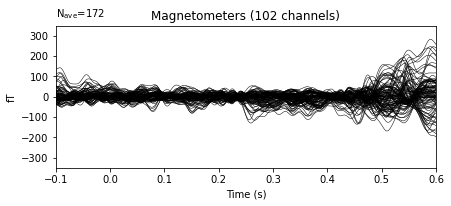

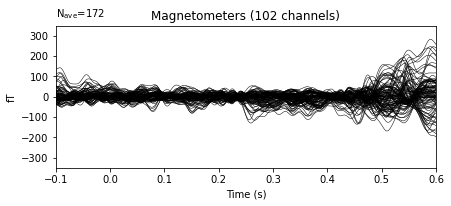

In [22]:
# Omissionss
epochs_mag[omission_events].crop(tmin=-0.1, tmax=0.6).average().plot(ylim=dict(mag=[-350,350]))

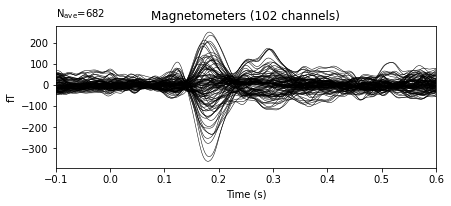

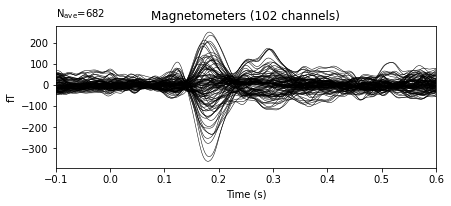

In [23]:
# Real Sounds
epochs_mag['object_real_10','object_real_9','object_real_8','living_real_10', 'living_real_9', 'living_real_8'].crop(tmin=-0.1, tmax=0.6).average().plot()